## 1. Для начала займемся предобработкой данных

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

Подгружаем базу данных и повторим некоторые действия первой работы

In [26]:
data = pd.read_csv('C:/Users/Alex/Desktop/._Chekanov_Aleksey_vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


В первой работе у меня было 2 проблемы с базой данных:
    1. Лишний столбик
    2. Неправильный год
Сразу же исправим это

In [27]:
data = data.drop(['Rank'], axis=1)

In [28]:
data.loc[data['Year'] == 2020].Year = 2007

Объединим переменные в группы

Посмотрим информацию по типам переменных

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


Теперь пропуски

In [30]:
data.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

А что по процентам?

In [31]:
data.isnull().sum()/len(data)

Name            0.000000
Platform        0.000000
Year            0.016327
Genre           0.000000
Publisher       0.003494
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

По сравнению со всей базой пропусков ничтожное количество

#### Теперь нужно подумать какие переменные нужны, а какие нет

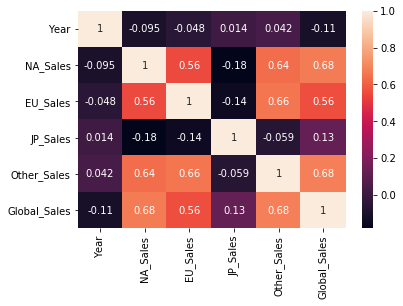

In [32]:
data_numeric = data.drop(['Name', 'Platform', 'Genre', 'Publisher'], axis = 1)
sns.heatmap(data_numeric.corr('kendall'), annot = True)

Судя по таблице корреляции, переменная 'Year' мало коррелирует с продажами, поэтому уберем ее, заодно избавившись от пропусков

### Комментарий
Действительно, на первый взгляд Year не сильно коррелирует, возможно, его удаление было правильным шагом, однако не стоит забывать, что корреляция здесь измеряет тесноту линейной связи, а у нас могут быть какие-нибудь нелинейные зависимости, которые тот же лес успешно бы отловил. Обычно в машинном обучении факторы отбрасывают, смотря на качество моделей на отложенных выборках, если оно улучшается после выкидывания - значит, сделали это не зря, если ухудшается - какая-то информация все-таки оставалась

In [33]:
data['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [34]:
data['Publisher'].value_counts()

Electronic Arts                           1351
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Unknown                                    203
Eidos Interactive                          198
Midway Games                               198
505 Games                                  192
Microsoft Game Studios                     189
D3Publisher  

Переменные 'Platform' , 'Publisher' и 'Name' слишком уникальные и мы не можем их обработать по аналогии с категориями

### Комментарий
Действительно, значения у них очень и очень уникальные, однако выкидывать стоило, возможно, не всё, согласитесь, что от платформы многое зависит, игрушки на пк стоят часто дешевле, чем на PS, на каких-то мобильных платформах ценообразование тоже иное и т.д., то есть явно какая-то информация может присутствовать. 

Платформу, возможно, стоило в дамми разбить, паблишер - согласен, слишком много уникальных, но, в основном, бОльшая часть игрушек паблишилась у топ-20 разработчиков, поэтому в таких ситуациях обычно поступают следующим образом - оставляют то число категорий, под которые подпадает процентов 70-90 всех наблюдений, а все остальные категории заменяют на "other", таким образом получится всего штук 20-30 дополнительных дамми-столбцов, которые вполне можно добавлять.

Насчет Name полностью согласен, слишком уникальная штука, чтобы пытаться с ней работать, проще дропнут. Хотя в соревнования по анализу данных зачастую работают и с такими переменными, например, смотрят, какие слова, в основном, входят в название, считают их частоты и т.д.

По итогам мы дропаем 4 переменные, а именно: 'Year' , 'Platform' , 'Publisher' и 'Name'

In [35]:
data = data.drop(['Year', 'Platform', 'Publisher', 'Name'], axis = 1)

In [36]:
data.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Sports,41.49,29.02,3.77,8.46,82.74
1,Platform,29.08,3.58,6.81,0.77,40.24
2,Racing,15.85,12.88,3.79,3.31,35.82
3,Sports,15.75,11.01,3.28,2.96,33.00
4,Role-Playing,11.27,8.89,10.22,1.00,31.37


## 2. Теперь работаем с избранными переменными

Перерабатываем жанры в дамми

In [37]:
data_categor = pd.get_dummies(data.Genre, dummy_na=False, prefix='Genre')
data_categor.head()

,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,0


Так как у нас здесь возникает линейная зависимочть между столбиками жанров, то один нужно дропнуть

In [38]:
data_categor = pd.get_dummies(data.Genre, dummy_na=False, prefix='Genre', drop_first=True)
data_categor.head()

,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,0


Объединяем табличку

In [39]:
target_var = ['Global_Sales']

contin_var = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

In [40]:
data = pd.concat([data.drop('Genre',axis=1),data_categor], axis=1)
data.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,41.49,29.02,3.77,8.46,82.74,0,0,0,0,0,0,0,0,0,1,0
1,29.08,3.58,6.81,0.77,40.24,0,0,0,1,0,0,0,0,0,0,0
2,15.85,12.88,3.79,3.31,35.82,0,0,0,0,0,1,0,0,0,0,0
3,15.75,11.01,3.28,2.96,33.00,0,0,0,0,0,0,0,0,0,1,0
4,11.27,8.89,10.22,1.00,31.37,0,0,0,0,0,0,1,0,0,0,0


Еще одной проблемой предыдущей работы была проблема неравномерности распределения продаж

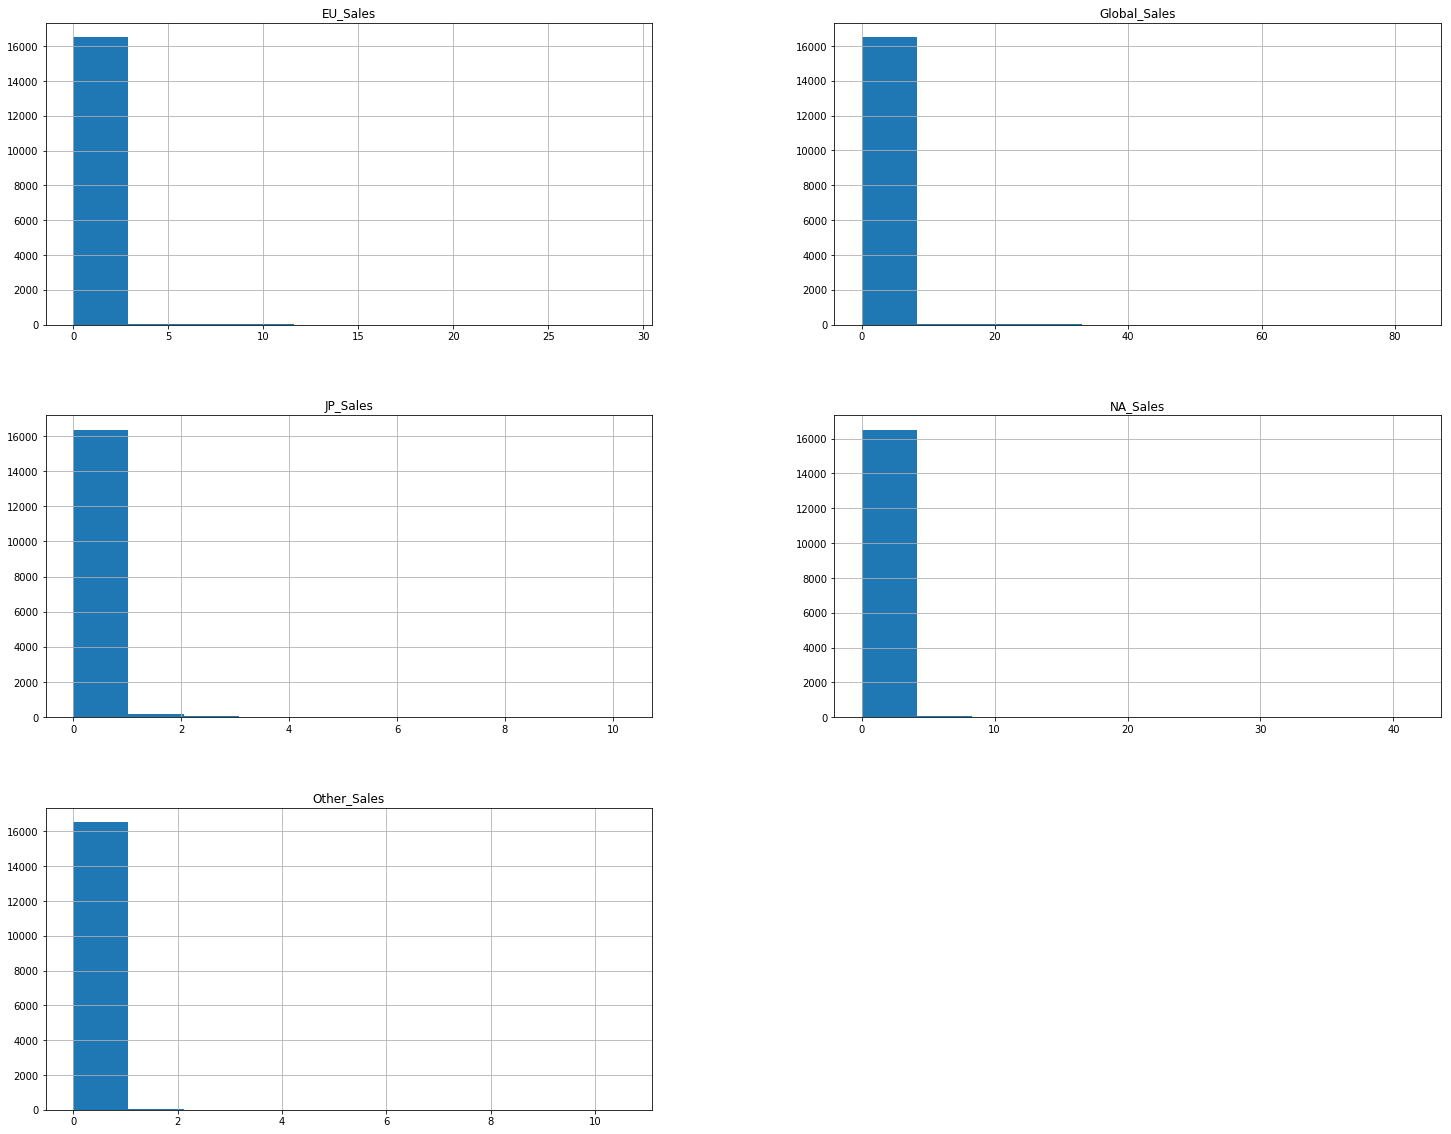

In [41]:
data_numeric = data.drop(['Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy'], axis = 1)
data_numeric.hist(figsize = (25, 20));

Придется прологарифмировать все продажи

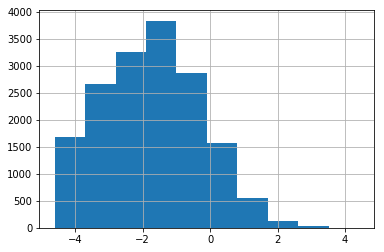

In [42]:
data['Global_Sales'] = np.log(data['Global_Sales'])
data.Global_Sales.hist()

После логарифмирования всех продаж, при скалировании выскакивала ошибка 'Input contains NaN, infinity or a value too large for dtype', поэтому проголарифмировал только целевую переменную

### Комментарий

Выскакивали они, скорее всего, по той простой причине, что у некоторых наблюдений продажи в каком-нибудь регионе были равны нулю, а логарифм от нуля как раз и даёт в питоне ошибку, чтобы этого не происходило перед лошарифмированием обычно приплюсовывают к переменной какое-нибудь небольшое число

## 3. Разбиваем выборку и учим на трэйне скалировщик скалировать, чтобы стохастический градиентый спуск быстрее обучил нашу регрессию (интересно, сколько человек также пошутило)

### Комментарий
Трое уже точно было ;)

А вообще всё верно сделали, что непрерывные переменные отшкалировали

In [43]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size = 0.3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_train[['EU_Sales', 'NA_Sales', 'JP_Sales','Other_Sales', 'Global_Sales']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [44]:
y_train = data_train['Global_Sales']
y_test = data_test['Global_Sales']

X_train = data_train.drop(['Global_Sales'], axis=1)
X_test = data_test.drop(['Global_Sales'], axis=1)

In [47]:
data_train_scale = scaler.transform(data_train[['EU_Sales', 'NA_Sales', 'JP_Sales','Other_Sales', 'Global_Sales']])
data_test_scale = scaler.transform(data_test[['EU_Sales', 'NA_Sales', 'JP_Sales','Other_Sales', 'Global_Sales']])

In [48]:
data_train[['EU_Sales', 'NA_Sales', 'JP_Sales','Other_Sales', 'Global_Sales']] = data_train_scale
data_test[['EU_Sales', 'NA_Sales', 'JP_Sales','Other_Sales', 'Global_Sales']] = data_test_scale

In [82]:
data_train.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
13451,-0.285173,-0.235550,-0.244951,-0.224495,-0.852393,0,0,0,0,0,1,0,0,0,0,0
11619,-0.308668,-0.272799,0.004326,-0.286110,-0.530389,0,0,0,0,0,0,0,0,0,0,1
10954,-0.308668,-0.272799,0.035486,-0.286110,-0.449694,0,0,0,0,0,0,0,0,1,0,0
15717,-0.296920,-0.272799,-0.244951,-0.286110,-1.480154,0,0,0,0,0,0,0,1,0,0,0
2326,0.208221,0.248685,-0.244951,0.822968,1.120177,0,0,0,0,0,0,0,1,0,0,0


In [51]:
y_train = data_train['Global_Sales']
y_test = data_test['Global_Sales']

X_train = data_train.drop(['Global_Sales'], axis=1)
X_test = data_test.drop(['Global_Sales'], axis=1)

## 4. Делаем константный прогноз

In [52]:
y_mean = np.mean(y_train)
y_pred_naive = np.ones(len(y_test)) * y_mean
y_pred_naive[:5]

array([1.75061043e-16, 1.75061043e-16, 1.75061043e-16, 1.75061043e-16,
       1.75061043e-16])

## 5. Применяем метрики качества  прогноза

### MAE

In [53]:
from sklearn import metrics

In [54]:
metrics.mean_absolute_error(y_test, y_pred_naive)

0.8178600379569516

In [55]:
metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred_naive))

1.2114672651516007

Ошибка на 1.2 единиц продаж

### MSE

In [56]:
metrics.mean_squared_error(y_test, y_pred_naive)

1.0105213073417365

In [57]:
metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_naive))

5.6711901010530505

In [58]:
np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_naive)))

2.3814260645783336

Ошибка на 2.4 единицы продаж

### MAPE

In [63]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test, y_pred_naive)

100.0

### R^2

In [64]:
metrics.r2_score(y_test, y_pred_naive)

-0.0006686038878116474

In [65]:
def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    pass

In [66]:
print_metrics(y_test, y_pred_naive)

MAE: 1.2114672651516007
RMSE: 2.3814260645783336
R2: -0.0006686038878116474
MAPE: 100.0


## 6. Сторим регрессию

### Линейная регрессия

In [68]:
from sklearn.linear_model import LinearRegression

model_regression = LinearRegression()
model_regression.fit(X_train, y_train)

y_pred_regr = model_regression.predict(X_test)

In [69]:
print_metrics(y_test,y_pred_regr)

MAE: 4565.463721365261
RMSE: 320478.00490877475
R2: 0.3129786479780369
MAPE: 111.23404572042726


Ошибка стала гораздо выше

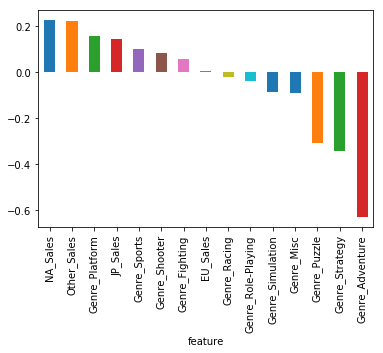

In [72]:
featureImportance = pd.DataFrame({"feature": data.drop('Global_Sales',axis=1).columns, 
                                  "importance": model_regression.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar');

Сильнее всего влияют NA_Sales, Other_Sales, Платформер ли эта игра и Спортивная ли это игра

### Комментарий
Эти переменные в положительную сторону влияют сильнее всего, то есть увеличивают выручку с продаж, а еще у нас есть интересные переменные, которые смотрят в обратную сторону и тоже достаточно важны, как и ожидалось, самые аутсайдеры - игры в приключенческом стиле, которые значительно снижают выручку, так же, как стратегии и паззлы. Крутые результаты :)

### Регрессия-LASSO

In [73]:
from sklearn.linear_model import Lasso

model_simplelasso = Lasso()
model_simplelasso.fit(X_train, y_train)

y_pred_lasso = model_simplelasso.predict(X_test)

In [74]:
print_metrics(y_test,y_pred_lasso)

MAE: 1.2114672651516003
RMSE: 2.3814260645783336
R2: -0.0006686038878116474
MAPE: 100.0


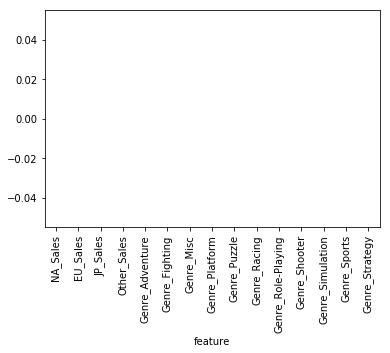

In [76]:
featureImportance = pd.DataFrame({"feature": data.drop('Global_Sales',axis=1).columns, 
                                  "importance": model_simplelasso.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar');

Важные факторы отсутсвуют, метрики качества такие же, как при константном прогнозе

### Комментарий
Действительно, регрессия слишком уж наказывала наши бедные коэффициенты, в результате просто стали прогнозировать константой

## 7. Подбор гиперпараметра для Lasso-регрессии

In [78]:
from sklearn.grid_search import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 0.8, 1, 5, 10]}
model_lasso = Lasso()

grid_cv_lasso = GridSearchCV(model_lasso, param_grid, cv = 5)
grid_cv_lasso.fit(X_train, y_train)
print('Лучшее значение параметра:', grid_cv_lasso.best_params_)

y_pred_lasso = grid_cv_lasso.predict(X_test)

Лучшее значение параметра: {'alpha': 0.001}


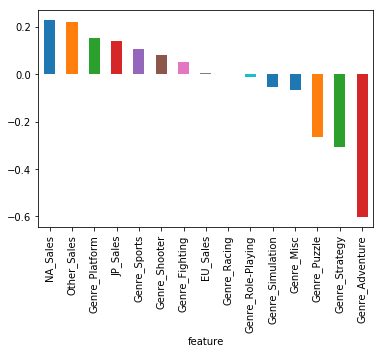

In [79]:
featureImportance = pd.DataFrame({"feature": data.drop('Global_Sales',axis=1).columns, 
                                  "importance": grid_cv_lasso.best_estimator_.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar');

In [80]:
print_metrics(y_test,y_pred_lasso)

MAE: 4599.144246950259
RMSE: 322854.3617644358
R2: 0.3127612941913527
MAPE: 109.78047090023462


## 8. Строим случайный лес

In [83]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

y_pred_forest = rf.predict(X_test)

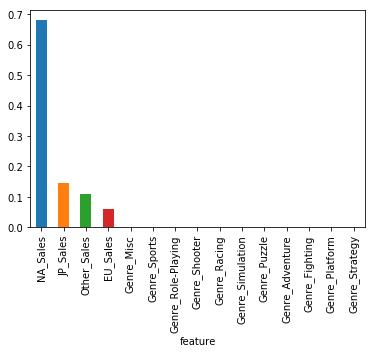

In [85]:
featureImportance = pd.DataFrame({"feature": data.drop('Global_Sales',axis=1).columns, 
                                  "importance": rf.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar');

In [86]:
print_metrics(y_test,y_pred_forest)

MAE: 0.060317394170193946
RMSE: 0.44548764591468676
R2: 0.9949698367555101
MAPE: 9.065339302976366


#### "Беги, лес! Беги, лес, которым управляют!"
Случайный лес дал нам самый лучший прогноз, поэтому при прогнозировании надо использовать его.

### Комментарий
Кажется, случайный лес единственный уловил связь между выручками в отдельных странах и общей выручкой, ведь, по большому счету, общая складывается из кусочков, поэтому качество прогноза практически идеальное, даже $R^2$ чуть-чуть не добрал до единички, то есть модель идеально подогналась под данные 

Итого - отличная работа, поздравляю!